In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
listings = pd.read_csv('data/listings.csv.gz', compression='gzip')

In [3]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [111]:
listings_expensive = listings[listings['price']>listings['price'].quantile(0.9)]
listings_cheap = listings[listings['price']<listings['price'].quantile(0.1)]

text = " ".join(listings_expensive['description'].fillna("").to_list())
text_expensive = text.replace('<br />', ' ').replace('<b>',' ').replace('<br',' ').replace('</b>',' ').replace('.','').replace(',','').replace(')','').replace('(','').replace('!','').replace('?','').replace('\'','').replace('\"','').replace(':','').replace(';','').replace('  ',' ')

text = " ".join(listings_cheap['description'].fillna("").to_list())
text_cheap = text.replace('<br />', ' ').replace('<b>',' ').replace('<br',' ').replace('</b>',' ').replace('.','').replace(',','').replace(')','').replace('(','').replace('!','').replace('?','').replace('\'','').replace('\"','').replace(':','').replace(';','').replace('  ',' ')

text_expensive = text_expensive.lower()
text_cheap = text_cheap.lower()

In [160]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = A.intersection(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity

In [162]:
A = set(text_cheap.split())
B = set(text_expensive.split())
jaccard_similarity(A, B)

0.3351474291284217

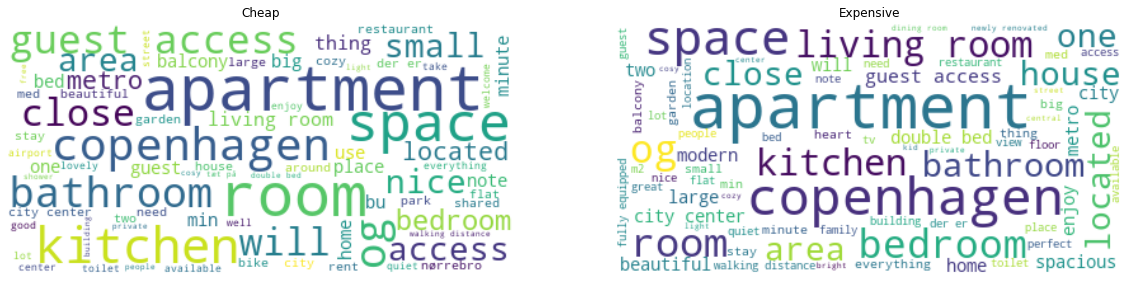

In [129]:
# Create and generate a word cloud image:
wordcloud_c = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(text_cheap)
wordcloud_e = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(text_expensive)

# Display the generated image:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wordcloud_c, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title('Cheap')
axs[1].imshow(wordcloud_e, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title('Expensive')
plt.show()

In [ ]:
cheap = [word for word in text_cheap.split() if word not in text_expensive.split()]
expensive = [word for word in text_expensive.split() if word not in text_cheap.split()]

In [163]:
A = set(cheap)
B = set(expensive)
jaccard_similarity(A, B)

0.0

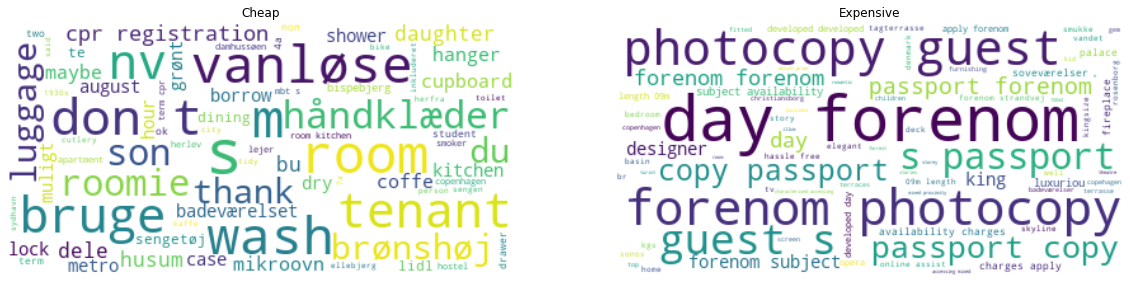

In [130]:
wordcloud_c = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(" ".join(cheap))
wordcloud_e = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(" ".join(expensive))

# Display the generated image:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wordcloud_c, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title('Cheap')
axs[1].imshow(wordcloud_e, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title('Expensive')
plt.show()

In [151]:
e = [t for t in expensive if t in pd.Series(expensive).value_counts()[(pd.Series(expensive).value_counts() < 50)]]

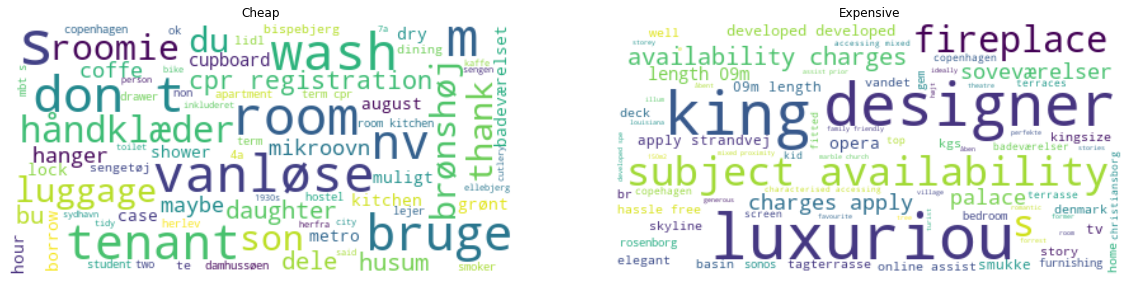

In [152]:
wordcloud_c = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(" ".join(cheap))
wordcloud_e = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(" ".join(e))

# Display the generated image:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wordcloud_c, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title('Cheap')
axs[1].imshow(wordcloud_e, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title('Expensive')
plt.show()

In [157]:
"kitchen" in expensive

False